### This project is about predicting how many medals a country will win at the Olympics by using historical data.

	importing the liberaries we will use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loading the dataset

In [2]:
teams = pd.read_csv("teams.csv")

Exploring the data

In [3]:
#printing the first 5 rows
teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [4]:
#get rid of unnecessary columns, note: they would be necessary in other cases but not in our case
teams.drop(['events', 'height', 'weight', 'prev_3_medals'], inplace=True, axis=1)

In [5]:
teams

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0,0.0
2140,ZIM,Zimbabwe,2004,14,25.1,3,0.0
2141,ZIM,Zimbabwe,2008,16,26.1,4,3.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0


In [6]:
#checking the correlation between the target and the other features
teams.corr()["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
medals         1.000000
prev_medals    0.920048
Name: medals, dtype: float64

* seams there is a good correlation between the number of athletes, previous medals and our target variable 'medals'

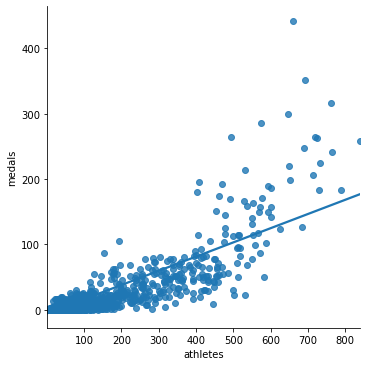

In [7]:
#plotting the correlation between the number of athletes and medals and fitting a linear regression line in them
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)

we saw the line fitted good in the data points in the previous example 
but not in the next one

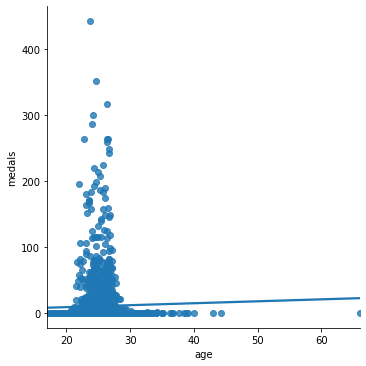

In [8]:
sns.lmplot(x="age", y="medals", data=teams, fit_reg=True, ci=None)

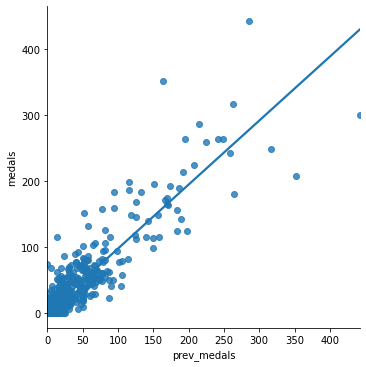

In [9]:
#plotting the correlation between the number of previous medals and medals and fitting a linear regression line in them
sns.lmplot(x="prev_medals", y="medals", data=teams, fit_reg=True, ci=None)

In [10]:
teams.head()

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0


Data preparation

In [11]:
#checking if there are missing values
teams.isna().sum()

team             0
country          0
year             0
athletes         0
age              0
medals           0
prev_medals    130
dtype: int64

* there are 130 missing values in the prev medals column, in this case this means those countries didn't participate in previous olympics

In [12]:
#one way to deal with missing values is to drop them which is we do in this scenario
teams.dropna(inplace=True)

In [13]:
teams.isna().any()

team           False
country        False
year           False
athletes       False
age            False
medals         False
prev_medals    False
dtype: bool

missing values gone.. 

### time to split the data into training and testing sets

In [14]:
#we use .copy() method so if we made a change to the slice of a dataframe we made, it won't change the original data
train = teams[teams['year']<2012].copy()
test = teams[teams['year']>=2012].copy()

In [15]:
type(train)

pandas.core.frame.DataFrame

In [16]:
train.head()
test.head()

,team,country,year,athletes,age,medals,prev_medals
6,AFG,Afghanistan,2012,6,24.8,1,1.0
7,AFG,Afghanistan,2016,3,24.7,0,1.0
24,ALB,Albania,2012,10,25.7,0,0.0
25,ALB,Albania,2016,6,23.7,0,0.0
37,ALG,Algeria,2012,39,24.8,1,2.0


In [17]:
#shape of the training data
train.shape

(1609, 7)

In [18]:
#shape of the test data
test.shape

(405, 7)

In [19]:
teams.head()

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0


### Time to build our model

the model we will use is linear regression

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

#### preparing the training features and target for model

In [21]:
train_X = train[['athletes', 'prev_medals']].values
train_X

array([[ 8.,  0.],
       [ 5.,  0.],
       [ 8.,  0.],
       ...,
       [26.,  0.],
       [14.,  0.],
       [16.,  3.]])

In [22]:
train_y = train['medals'].values
train_y

array([0, 0, 0, ..., 0, 3, 4], dtype=int64)

#### Fitting the model to the data

In [23]:
reg.fit(train_X,train_y)

LinearRegression()

#### preparing the test features and target for prediction and evaluation

In [24]:
test_X = test[['athletes', 'medals']].values
test_y = test['medals'].values
predictions = reg.predict(test_X)

In [25]:
# adding a prediction column to the test data so it would be easy to evaluate the predictions
test['predictions'] = predictions

#the score of the model
reg.score(test_X, test_y)

0.9825669412743637

In [26]:
test.head()

,team,country,year,athletes,age,medals,prev_medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1,1.0,-0.961221
7,AFG,Afghanistan,2016,3,24.7,0,1.0,-1.926958
24,ALB,Albania,2012,10,25.7,0,0.0,-1.425032
25,ALB,Albania,2016,6,23.7,0,0.0,-1.711847
37,ALG,Algeria,2012,39,24.8,1,2.0,1.405004


#### notice the prediction column has negative values and unrounded values which is impossible to happen and inaccurate
we gotta handle that

In [27]:
#assigning all values under 0 to 0
test.loc[test['predictions']<0, 'predictions'] = 0

In [28]:
test

,team,country,year,athletes,age,medals,prev_medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1,1.0,0.000000
7,AFG,Afghanistan,2016,3,24.7,0,1.0,0.000000
24,ALB,Albania,2012,10,25.7,0,0.0,0.000000
25,ALB,Albania,2016,6,23.7,0,0.0,0.000000
37,ALG,Algeria,2012,39,24.8,1,2.0,1.405004
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0,0.0,0.000000
2131,ZAM,Zambia,2012,7,22.6,0,0.0,0.000000
2132,ZAM,Zambia,2016,7,24.1,0,0.0,0.000000
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0,0.000000


In [29]:
#rounding values
test['predictions'] = test['predictions'].round()

In [30]:
test

,team,country,year,athletes,age,medals,prev_medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1,1.0,0.0
7,AFG,Afghanistan,2016,3,24.7,0,1.0,0.0
24,ALB,Albania,2012,10,25.7,0,0.0,0.0
25,ALB,Albania,2016,6,23.7,0,0.0,0.0
37,ALG,Algeria,2012,39,24.8,1,2.0,1.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0,0.0,0.0
2131,ZAM,Zambia,2012,7,22.6,0,0.0,0.0
2132,ZAM,Zambia,2016,7,24.1,0,0.0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0,0.0


In [31]:
# measuring the difference between predicted and actual values to see how did our model do
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test['medals'], test['predictions'])

In [32]:
error

1.5950617283950617

In [33]:
teams['medals'].describe()

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

#### note that if the error value is larger than the std there is something wrong

In [34]:
#checking the accuracy of our predictions for usa
test[test["team"]=="USA"]

,team,country,year,athletes,age,medals,prev_medals,predictions
2053,USA,United States,2012,689,26.7,248,317.0,233.0
2054,USA,United States,2016,719,26.4,264,248.0,248.0


In [35]:
test[test["team"]=="IND"]

,team,country,year,athletes,age,medals,prev_medals,predictions
907,IND,India,2012,95,26.0,6,3.0,9.0
908,IND,India,2016,130,26.1,2,6.0,9.0


In [36]:
errors = (test["medals"] - predictions).abs()

In [37]:
#grouping error by team
error_by_team = errors.groupby(test["team"]).mean()
#groubing medals by team
medals_by_team = test["medals"].groupby(test["team"]).mean()
#error to medal by team ratio
error_ratio =  error_by_team / medals_by_team 

In [38]:
#cleaning the error ratio from infinite data
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

team
AFG    3.888179
ALG    1.023422
ARG    0.310706
ARM    0.195573
AUS    0.106310
         ...   
UKR    0.653485
USA    0.060557
UZB    0.092349
VEN    2.085521
VIE    0.527145
Name: medals, Length: 97, dtype: float64

<AxesSubplot:ylabel='Frequency'>

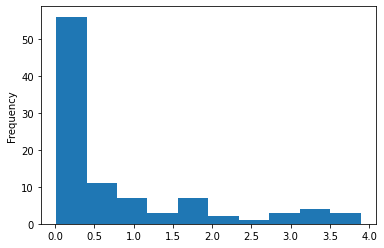

In [39]:
#plotting the error ratio to understand it more
error_ratio.plot.hist()

In [40]:
error_ratio.sort_values()

team
RUS    0.015762
CHN    0.027273
GER    0.056700
USA    0.060557
CRO    0.065555
         ...   
JOR    3.314549
BDI    3.386253
NIG    3.673068
AUT    3.882638
AFG    3.888179
Name: medals, Length: 97, dtype: float64

This model works well for countries which have a high medal count, and compete in a stable number of events annually. For countries that get fewer medals, you'd want to build this model in a different way.

###### This project is a practical application of Dataquest channel on YouTube.